In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
df = df.rename(columns={'Churn?': 'Churn'})

In [3]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [4]:
df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn              object
dtype: object

In [5]:
df['Churn'] = df['Churn'].map(lambda x:1 if x=='True.' else 0)

In [6]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
df.isnull().any()

State             False
Account Length    False
Area Code         False
Phone             False
Int'l Plan        False
VMail Plan        False
VMail Message     False
Day Mins          False
Day Calls         False
Day Charge        False
Eve Mins          False
Eve Calls         False
Eve Charge        False
Night Mins        False
Night Calls       False
Night Charge      False
Intl Mins         False
Intl Calls        False
Intl Charge       False
CustServ Calls    False
Churn             False
dtype: bool

#NO NULL VALUES


In [8]:
df.duplicated().sum()

0

No duplicate values

In [9]:
df["Int'l Plan"] = df["Int'l Plan"].map(lambda x:1 if x=='yes' else 0)
df["VMail Plan"] = df['VMail Plan'].map(lambda x:1 if x=='yes' else 0)

In [10]:
df.head()
df.drop(columns={'State','Area Code', 'Phone'}, inplace=True)


In [11]:
df.columns

Index(['Account Length', 'Int'l Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [12]:
def plot_factorplot(attr,labels=None):
    sns.catplot(data=df,kind='count',height=5,aspect=1.5,x=attr)

In [13]:
cat_df=df.select_dtypes(include='object')

for i in cat_df:
    plt.figure(figsize=(15, 15))
    plot_factorplot(i)

In [14]:
df.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [15]:
df.dtypes

Account Length      int64
Int'l Plan          int64
VMail Plan          int64
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn               int64
dtype: object

In [16]:
df.corr()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
Account Length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Int'l Plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
VMail Plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
VMail Message,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Day Mins,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Day Calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Day Charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Eve Mins,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Eve Calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Eve Charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


In [17]:
import matplotlib.pyplot as plt

In [18]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [19]:
X=df.drop(columns="Churn")
Y=df[["Churn"]]

Y.columns


Index(['Churn'], dtype='object')

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
train_pred = logreg.predict(X_train)

In [22]:
test_pred = logreg.predict(X_test)


In [23]:
from sklearn import metrics
metrics.confusion_matrix(Y_train,train_pred)


array([[2213,   58],
       [ 325,   70]], dtype=int64)

In [24]:
metrics.accuracy_score(Y_train,train_pred)

0.8563390847711928

metrics.accuracy_score(Y_test, test_pred)


In [25]:
metrics.accuracy_score(Y_test, test_pred)


0.8755622188905547

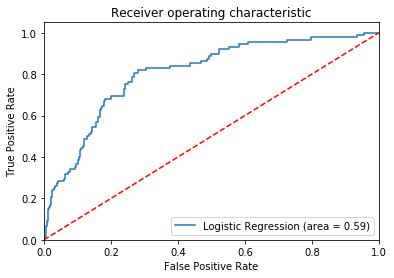

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ROC_auc = roc_auc_score(Y_test,test_pred)
fpr, tpr, thresholds = roc_curve(Y_test,logreg.predict_proba(X_test)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % ROC_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [27]:
#KNN Algortith : 
from sklearn.neighbors import KNeighborsClassifier

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
train_pred_knn = knn.predict(X_train)

In [30]:
test_pred_knn = knn.predict(X_test)

In [31]:
metrics.accuracy_score(Y_train,train_pred)

0.8563390847711928

In [32]:
metrics.accuracy_score(Y_test, test_pred)

0.8755622188905547

K Means ++

In [43]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.32758048,  1.6170861 ,  1.23488274, ..., -0.0856905 ,
        -0.42793202, -0.41167182],
       [-0.32758048,  1.6170861 ,  1.30794844, ...,  1.2411686 ,
        -0.42793202, -0.41167182],
       [-0.32758048, -0.61839626, -0.59175986, ...,  0.69715637,
        -1.1882185 , -0.41167182],
       ...,
       [-0.32758048, -0.61839626, -0.59175986, ...,  1.3871231 ,
         0.33235445, -0.41167182],
       [ 3.05268496, -0.61839626, -0.59175986, ..., -1.87695028,
         0.33235445, -0.41167182],
       [-0.32758048,  1.6170861 ,  1.23488274, ...,  1.2411686 ,
        -1.1882185 , -0.41167182]])

In [34]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 ... 1 0 0]


In [37]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='

In [39]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

[-31961697.997862697,
 -25459949.387223028,
 -21663319.25237355,
 -18820675.40847835,
 -17150770.997785375,
 -15775420.52603372,
 -14882110.225531626,
 -14045623.761677526,
 -13425935.109269913,
 -12807387.09126812,
 -12323832.814359182,
 -11967416.180541568,
 -11556525.764705367,
 -11274369.144875944,
 -10985687.563609166,
 -10774142.688718494,
 -10518726.686407376,
 -10327402.916471936,
 -10129049.00658283]

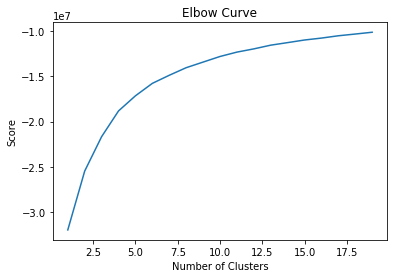

In [41]:
import pylab as pl
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

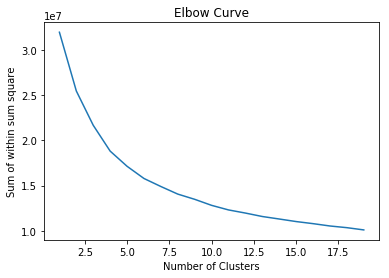

In [42]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Sum of within sum square')
pl.title('Elbow Curve')
pl.show()

In [44]:
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( vals )
labels = kmeans.labels_
df_scaled["Clus_km"] = labels


NameError: name 'vals' is not defined